In [1]:
import skimage.io as io
import skimage.color as color
from skimage import exposure
from skimage.morphology import square
import skimage.morphology as morphology
import skimage.feature as feature
import skimage.measure as measure
from skimage import filters
import numpy as np
import math
import cv2

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [323]:
path=r'E:\python_code\car_number_recognition\10_plate.jpg'
img = io.imread(path)
flag=0
if '_1' in path:
    flag=1
img = exposure.rescale_intensity(img, in_range='image', out_range=(0, 1))

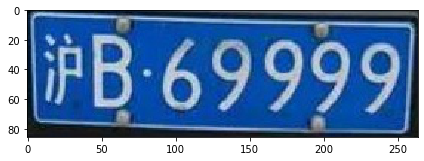

In [324]:
io.imshow(img)

In [325]:
img2 = color.rgb2gray(img)

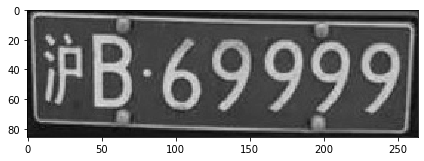

In [326]:
io.imshow(img2)

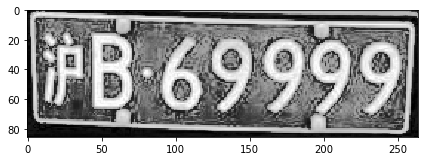

In [327]:
img5 = exposure.equalize_hist(img2)
io.imshow(img5)

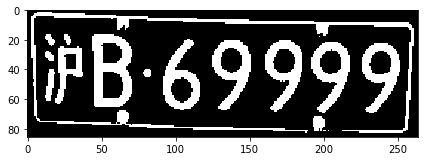

In [328]:
threshold_value = filters.threshold_otsu(img2)

# 应用阈值二值化
binary_image = img2 > threshold_value
io.imshow(binary_image)
img3 = feature.canny(img2, sigma=3)

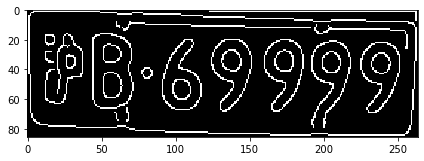

In [329]:
io.imshow(img3)

22704


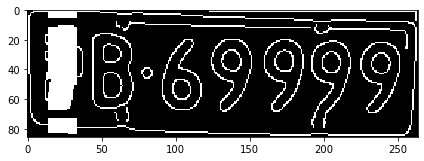

In [330]:

if flag==0:
    img4=img3.copy()
    kernel = np.ones((10, 10), dtype=np.uint8)
    area=img4.shape[0]*img4.shape[1]
    print(area)
    low=int(img3.shape[1]*0.056)
    high=int(img3.shape[1]*0.13)
    # 仅对左侧1/8进行膨胀操作
    result = morphology.dilation(img4[:, low:high], kernel)
    img4[:, low:high] = result
    io.imshow(img4)

In [331]:
if flag==1:
    kernel=np.ones((3,8),dtype=np.uint8)
    img4=img3.copy()
    area=img4.shape[0]*img4.shape[1]
    print(area)
    low=int(img3.shape[1]*0.026)
    high=int(img3.shape[1]*0.1)
    # 仅对左侧1/8进行膨胀操作
    result = morphology.dilation(img4[:, low:high], kernel)
    img4[:, low:high] = result
    io.imshow(img4)

232


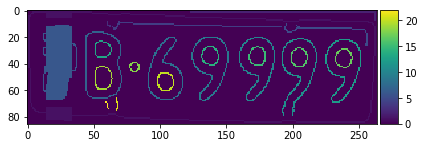

In [332]:
label_img = measure.label(img4)
regions = measure.regionprops(label_img)
print(regions.__sizeof__())
io.imshow(label_img)

22


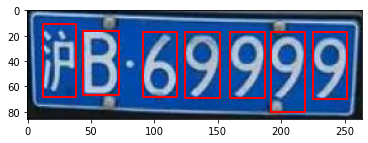

In [226]:
fig, ax = plt.subplots()
area=img4.shape[0]*img4.shape[1]
ax.imshow(img, cmap=plt.cm.gray)
cnt=0
def in_bboxes(bbox, bboxes):
    for bb in bboxes:
        minr0, minc0, maxr0, maxc0 = bb
        minr1, minc1, maxr1, maxc1 = bbox
        if minr1 >= minr0 and maxr1 <= maxr0 and minc1 >= minc0 and maxc1 <= maxc0:
            return True
    return False
print(len(regions))
#print(img4.shape[0],img4.shape[1])
top=int(0.20*img4.shape[0])
bboxes = []
for props in regions:
    y0, x0 = props.centroid
    minr, minc, maxr, maxc = props.bbox
    
    if maxc - minc > img4.shape[1] / 7 or maxr - minr < img4.shape[0] / 3:
        continue
    bbox = [minr, minc, maxr, maxc]
    if in_bboxes(bbox, bboxes):
        continue
        
    if abs(y0 - img4.shape[0] / 2) > img4.shape[0] / 4:
        continue
    if minr<6 and maxc>img4.shape[1]*8/9:
        continue
    area1 = (maxr - minr) * (maxc - minc)
    # print(maxr,minr)
    #print(maxc)
    #print(minr)
    #if 4<abs(maxc-img4.shape[1])<10 :
       # continue
    bi=area1/area
    #print(bi)
    if bi>0.02:
        #print(bi)
        #print("符合条件的边框面积:", area1)
        minr=min(top,minr)
        #print(minr)
        bbox[0]=minr
        bboxes.append(bbox)
        
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        ax.plot(bx, by, '-r', linewidth=2)

In [227]:
bboxes = sorted(bboxes, key=lambda x: x[1])
print("Sorted bboxes:", bboxes)
imgl=cv2.imread(path)
cnt=1
for bbox in bboxes:
    minr, minc, maxr, maxc = bbox
    cropped_region = imgl[minr:maxr, minc:maxc]
    output_filename = f'10_{cnt}.jpg'
    cv2.imwrite(output_filename, cropped_region)
    #plt.figure()
    #plt.imshow(cropped_region, cmap=plt.cm.gray)
    #plt.title(f'Cropped Region {cnt}')
    #plt.savefig(r'E:\python_code\car_number_recognition\4_cropped_image_{}.jpg'.format(cnt))
    #plt.show()
    cnt += 1

Sorted bboxes: [[11, 12, 68, 38], [16, 44, 67, 72], [17, 91, 68, 118], [17, 124, 69, 152], [17, 160, 69, 187], [17, 192, 80, 219], [17, 225, 70, 252]]


Sorted bboxes: [[40, 28, 200, 104], [46, 125, 198, 201], [49, 261, 197, 336], [49, 356, 200, 431], [49, 451, 201, 526], [49, 546, 203, 622], [49, 644, 205, 720]]


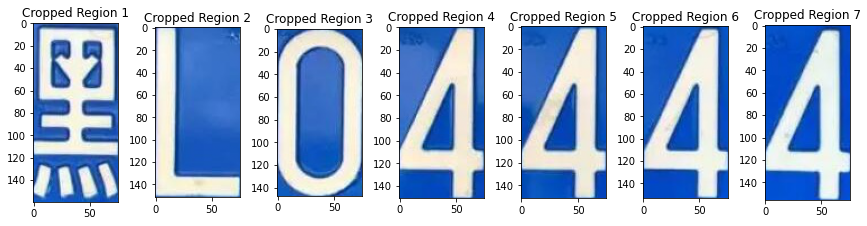

In [32]:
import matplotlib.pyplot as plt

bboxes = sorted(bboxes, key=lambda x: x[1])
print("Sorted bboxes:", bboxes)

fig, axes = plt.subplots(1, len(bboxes), figsize=(12, 4))  # Create a subplot with multiple axes

for i, bbox in enumerate(bboxes):
    minr, minc, maxr, maxc = bbox
    cropped_region = img[minr:maxr, minc:maxc]
    axes[i].imshow(cropped_region, cmap=plt.cm.gray,aspect='auto')
    axes[i].set_title(f'Cropped Region {i+1}')
    axes[i].set_aspect('equal')
    plt.savefig(f'cropped_region_{i+1}.png')
plt.tight_layout() 
plt.show()